In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import re
from konlpy.tag import *

# m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')

### 속성값 반영 로직

In [78]:
import konlpy
print(konlpy.__file__)

c:\Users\shopperhouse\anaconda3\envs\mecab\lib\site-packages\konlpy\__init__.py


In [68]:
general = pd.read_csv("C:/Users/shopperhouse/Desktop/cherie/new_project/data/adaptor_modified_score.csv", index_col = 0)

In [69]:
general.head(3)

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,돈 추가해서 구매하는 게 더 좋네요,service,"['추가', '더', '좋다']","추가, 더, 좋다",['좋다'],2,1
3,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240716,5,돈 추가해서 구매하는 게 더 좋네요 금액 차이 얼마 안 나는데 기능은 더 좋아요,44,0,general,금액 차이 얼마 안 나는데 기능은 더 좋아요,service,"['나다', '기능', '더', '좋다']","나다, 기능, 더, 좋다",['좋다'],2,1
6,스카이트립,여행 멀티 플러그 해외 여행용 어댑터 일본 멀티탭 콘센트 멀티 어댑터 유럽 중국,20240714,5,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,26,0,general,콤팩트한 디자인과 실용성에 높은 점수 주었습니다,product,"['콤팩트', '디자인', '실용', '높다', '주다']","콤팩트, 디자인, 실용, 높다, 주다",['높다'],1,1


In [70]:
# Topic 있는 행만 추출 (나중에 Topic 리스트만 대입 반영 예정)
topic_lst = ['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입']
# topic_lst = ['사이즈','흡수력','소변','크기','품질','냄새','소형견','배변패드','두께','아기','대형','소형']
# topic_lst = ['피부','팩','효과','얼굴','마스크팩','주름','일인일팩','진정','관리']
# topic_lst = ['청소기','흡입력','청소','디자인','성능','먼지','무선','소음','무게','배터리','충전','기능','소리','구성품']
# topic_lst = ['사이즈','레깅스','운동','색상','여름','재질','엉덩이','핏','신축성','디자인','바지']

In [71]:
def filtering_review_topic(df, topics):
    mask = df['content_lst'].apply(lambda x: any(topic in x for topic in topics))
    return df[mask]

filtered_df = filtering_review_topic(general, topic_lst)
len(filtered_df)

4931

리뷰 합산 점수

In [86]:
#### 전체합이 100이라 생각하고, 합산의 결과 

# 전체 리뷰 개수(전체합) 
total_review_cnt = len(general)
print(f'전체 리뷰 개수 : {total_review_cnt}')

# 전체 리뷰 중 필터링 된 리뷰 개수 (Topic 전체 리뷰)
filtered_review_cnt = len(filtered_df)
print(f'Topic 리뷰 개수 : {filtered_review_cnt}\n')
print('-'*30,'\n')

#### 전체 리뷰 중 sentiment 종합 점수
# 1점이 총 점수이므로 scaling을 5점 맞추기 위해 *5 진행
total_sentiment_score = round((sum(general['sentiment']) / total_review_cnt)*5,1)
print(f'전체 감성 평점 : {total_sentiment_score}')

#### 전체 Topic의 sentiment 종합 점수
topic_sentiment_score = round(sum(filtered_df['sentiment'] / filtered_review_cnt)*5,1)
print(f'Topic들의 감성 평점 : {topic_sentiment_score}')
print('-'*30,'\n')

#### 전체 리뷰 중 polarity 평균
total_polarity_score = round((sum(general['polarity'] / total_review_cnt)), 1)
print(f'전체 polarity 점수 평균 : {total_polarity_score}')

topic_polarity_score = round((sum(filtered_df['polarity'] / filtered_review_cnt)), 1)
print(f'topic들의 polarity 점수 평균 : {topic_polarity_score}')
print('-'*30,'\n')


#### rating 기준
total_ori_rating = round((sum(general['rating_lst'] / total_review_cnt)), 1)
print(f'original review rating : {total_ori_rating}')

topic_ori_rating = round((sum(filtered_df['rating_lst'] / filtered_review_cnt)), 1)
print(f'orginal topic rating : {topic_ori_rating}')


#### 계산된 polarity 각각의 평균 자체를 정규화
total_polarity_minmax_norm = round(((general['polarity'] - min(general['polarity'])) / (max(general['polarity']) - min(general['polarity'])))*4 +1, 1)
mean_total_polarity_minmax_norm = round((sum(total_polarity_minmax_norm) / total_review_cnt), 1)
print(f'total polarity 5점 척도 변경 : {mean_total_polarity_minmax_norm}')

topic_olarity_minmax_norm = round(((filtered_df['polarity'] - min(filtered_df['polarity'])) / (max(filtered_df['polarity']) - min(filtered_df['polarity'])))*4 +1, 1)
mean_topic_olarity_minmax_norm = round((sum(topic_olarity_minmax_norm) / filtered_review_cnt), 1)
print(f'topic polarity 5점 척도 변경 : {mean_topic_olarity_minmax_norm}')
print('-'*30,'\n')

# token화된 sentence groupby 후 진행
groupby_total_df = general.groupby(general.index)['polarity'].sum().to_frame()
groupby_total_polarity_minmax_norm = round(((groupby_total_df['polarity'] - min(groupby_total_df['polarity'])) / (max(groupby_total_df['polarity']) - min(groupby_total_df['polarity'])))*4 +1, 1)
mean_total_polarity_minmax_norm = round((sum(groupby_total_polarity_minmax_norm) / len(groupby_total_df)), 1)
print(f'total groupby polarity 5점 척도 변경 : {mean_total_polarity_minmax_norm}')

groupby_df = filtered_df.groupby(filtered_df.index)['polarity'].sum().to_frame()
groupby_total_polarity_minmax_norm = round(((groupby_df['polarity'] - min(groupby_df['polarity'])) / (max(groupby_df['polarity']) - min(groupby_df['polarity'])))*4 +1, 1)
mean_topic_polarity_minmax_norm = round((sum(groupby_total_polarity_minmax_norm) / len(groupby_df)), 1)
print(f'topic groupby polarity 5점 척도 변경 : {mean_topic_polarity_minmax_norm}')


전체 리뷰 개수 : 11038
Topic 리뷰 개수 : 4931

------------------------------ 

전체 감성 평점 : 3.0
Topic들의 감성 평점 : 2.9
------------------------------ 

전체 polarity 점수 평균 : 1.4
topic들의 polarity 점수 평균 : 1.5
------------------------------ 

original review rating : 4.9
orginal topic rating : 4.8
total polarity 5점 척도 변경 : 2.6
topic polarity 5점 척도 변경 : 2.6
------------------------------ 

total groupby polarity 5점 척도 변경 : 2.4
topic groupby polarity 5점 척도 변경 : 2.7


#### Topic sentiment 점수

topic 기준 추출

In [73]:
# Topic 있는 행만 추출 (나중에 Topic 리스트만 대입 반영 예정)
topic_lst = ['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입']
# topic_lst = ['사이즈','흡수력','소변','크기','품질','냄새','소형견','배변패드','두께','아기','대형','소형']
# topic_lst = ['피부','팩','효과','얼굴','마스크팩','주름','일인일팩','진정','관리']
# topic_lst = ['청소기','흡입력','청소','디자인','성능','먼지','무선','소음','무게','배터리','충전','기능','소리','구성품']
# topic_lst = ['사이즈','레깅스','운동','색상','여름','재질','엉덩이','핏','신축성','디자인','바지']

In [42]:
# 리스트 입력 받으면 리스트에 대한 sentiment 결과값 도출 코드 작성
def list_topic_sentiment_score(df, topic_list, k=1):
    '''
    리스트 입력시 각 keyword에 대한 sentiment 도출
    '''
    keyword_sent_result = []

    for i in topic_list:
        var_name5 = f'{i}_sent'
        var_name6 = f'{i}_score'
        var_name7 = f'{i}_norm_score'

        #brand_filtered = general[general['brand_name'].contains('스카이트립')]

        globals()[var_name5] = general[general.tokenized_sentence.notna() & general.tokenized_sentence.str.contains(i)]

        if len(globals()[var_name5]) > 0:
            globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
        else:
            globals()[var_name6] = 0
        
        # 5까지로 정규화
        globals()[var_name7] = round(globals()[var_name6]*5,1)
        
        # 결과 리스트에 append
        keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

    return keyword_sent_result

In [41]:
list_topic_sentiment_score(filtered_df, 
                 topic_lst)

In [74]:
# 리스트 입력 받으면 리스트에 대한 polarity 결과값 도출 코드 작성
def list_topic_polarity_score(df, topic_list):
    '''
    리스트 입력시 각 keyword에 대한 polarity 도출
    '''
    keyword_sent_result = []

    for i in topic_list:
        var_name5 = f'{i}_polarity'
        var_name6 = f'{i}_norm_polairy_score'

        globals()[var_name5] = general[general.tokenized_sentence.notna() & general.tokenized_sentence.str.contains(i)]
        topic_review_cnt = len(globals()[var_name5])
        print()

        globals()[var_name6] = round(((globals()[var_name5]['polarity'] - min(globals()[var_name5]['polarity'])) / (max(globals()[var_name5]['polarity']) - min(globals()[var_name5]['polarity'])))*4+1, 1)
        mean_topic_olarity_minmax_norm = round((sum(globals()[var_name6]) / topic_review_cnt), 1)
        
        # 결과 리스트에 append
        keyword_sent_result.append({"keyword": i, "polarity_norm_score": mean_topic_olarity_minmax_norm})

    return keyword_sent_result

In [ ]:
list_topic_polarity_score(filtered_df, topic_lst)

brand 기준 추출

In [69]:
# 고유 브랜드들
brands_unique = list(general['brand_name'].unique())
brands_unique

['스카이트립',
 '감비앤코',
 '지티스몰',
 '파워존 스토어',
 'UM2 COBY',
 '주식회사 지토스',
 '까만몰',
 '멜리언스 스토어',
 '해외직구연구소',
 '코시',
 '보코 스토어',
 'yullshop',
 '퍼플고릴라',
 '조이텍',
 '인푸터',
 '한걸음 유통',
 '지성아이엔씨',
 '클리커스',
 '바이미니멀',
 '멀티아',
 '어라이브인',
 '여기 상점',
 'N해외직구',
 '투명샵',
 'GHF',
 '올웨이즈온',
 '퍼플래빗몰',
 '홍콩 상회',
 '파워존 공식몰',
 'WOHNEN',
 '이쏘코리아',
 '트립플',
 'MD홍',
 '티에프엘',
 '케이블마트',
 '쇼퍼-하우스',
 '해피보이마트',
 '에스제이에이엔',
 '트레블이지',
 '대신이앤엘',
 '여행용품 디스웨이',
 '에이치케이코퍼레이션',
 '로리스토어',
 '호호아일랜드',
 'movic',
 '자연의일상',
 '생활탐정홈즈',
 '정훈테크',
 '가플스토어',
 '제이팀',
 '아두이노',
 '지꿍샵',
 '스마트파워탭',
 '싸이소',
 '알뜰쇼핑학과',
 '디엘티테크코리아',
 '챰',
 '슈퍼센트마켓',
 '벨로엘이디',
 '단디판다',
 '한일전기산업',
 'morac',
 '가우넷',
 '주파집',
 '아이정']

In [73]:
# def list_brand_topic_score(df, topic_lst, brands):
#     keyword_sent_result = []
#     brands_sent_result = []
#     brand_result = []

#     for i in topic_lst:
#         var_name5 = f'{i}_polarity'
#         var_name6 = f'{i}_norm_polairy_score'

#         # 브랜드로 필터링
#         brand_filtered = df[df['brand_name'].str.contains('|'.join(brands))]
#         brand_review_cnt = len(brand_filtered)

#         # 토큰화된 문장에 키워드가 포함된 경우 필터링
#         topic_filtered = brand_filtered[brand_filtered.tokenized_sentence.notna() & brand_filtered.tokenized_sentence.str.contains(i)]
        
#         if not topic_filtered.empty:  # 필터된 데이터가 존재할 때만 처리
#             min_polarity = min(topic_filtered['polarity'])
#             max_polarity = max(topic_filtered['polarity'])
            
#             if min_polarity != max_polarity:  # 최소값과 최대값이 동일하지 않을 때만 계산
#                 globals()[var_name6] = round(((topic_filtered['polarity'] - min_polarity) / (max_polarity - min_polarity)) * 4 + 1, 1)
#                 mean_topic_polarity_minmax_norm = round(sum(globals()[var_name6]) / brand_review_cnt, 1)
#             else:
#                 mean_topic_polarity_minmax_norm = 3.0  # 중립값 설정
#         else:
#             mean_topic_polarity_minmax_norm = 3.0  # 중립값 설정
        
#         # 결과 리스트에 append
#         keyword_sent_result.append({"keyword": i, "sentiment_norm_score": mean_topic_polarity_minmax_norm})

#         # 브랜드 결과 리스트에 append
#         brands_sent_result.append({"brands": ', '.join(brands), "keyword": i, "sentiment_norm_score": mean_topic_polarity_minmax_norm})

#         # 브랜드별 개별 값도 추가
#         for j in brands:
#             var_name7 = f'{i}_{j}_brand_sent'
#             var_name8 = f'{i}_{j}_brand_norm_score'
#             var_name9 = f'{j}_brand_df'

#             globals()[var_name9] = df[df['brand_name'].str.contains(j)]
#             globals()[var_name7] = globals()[var_name9][globals()[var_name9].tokenized_sentence.str.contains(i)]

#             if not globals()[var_name7].empty:  # 필터된 데이터가 존재할 때만 처리
#                 min_polarity = min(globals()[var_name7]['polarity'])
#                 max_polarity = max(globals()[var_name5]['polarity'])

#                 if min_polarity != max_polarity:  # 최소값과 최대값이 동일하지 않을 때만 계산
#                     globals()[var_name8] = round(((globals()[var_name7]['polarity'] - min_polarity) / (max_polarity - min_polarity)) * 4 + 1, 1)
#                     mean_topic_polarity_minmax_norm = round(sum(globals()[var_name8]) / brand_review_cnt, 1)
#                 else:
#                     mean_topic_polarity_minmax_norm = 3.0  # 중립값 설정
#             else:
#                 mean_topic_polarity_minmax_norm = 3.0  # 중립값 설정

#             # 브랜드 결과 리스트에 append
#             brand_result.append({"brand": j, "keyword": i, "sentiment_norm_score": mean_topic_polarity_minmax_norm})

#     total_brands_result_df = pd.DataFrame(brands_sent_result)
#     diff_brands_result_df = pd.DataFrame(brand_result)
    
#     return total_brands_result_df, diff_brands_result_df


In [48]:
# 개별 브랜드별 keyword impact Heatmap 시각화

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

fig_size_input = (20, 32)

def brand_impact_topic(diff_brands_result_df, is_annot=True, fig_size_input=fig_size_input):
    """
    # 파라미터 정보
        1. diff_brands_result_df : list_brand_topic_score 함수 적용 [1] index 데이터프레임
        2. is_annot : heatmap에 annot 표시 여부
        3. fig_size_input : Heatmap figsize 설정
    """
    ax = plt.subplots(figsize=fig_size_input) 
    heat_result = sns.heatmap(diff_brands_result_df.pivot(index='brand',columns='keyword', values='sentiment_norm_score'), 
                              center=0, cmap='Blues', annot=is_annot, fmt='.3g')
    return heat_result

<Axes: xlabel='keyword', ylabel='brand'>

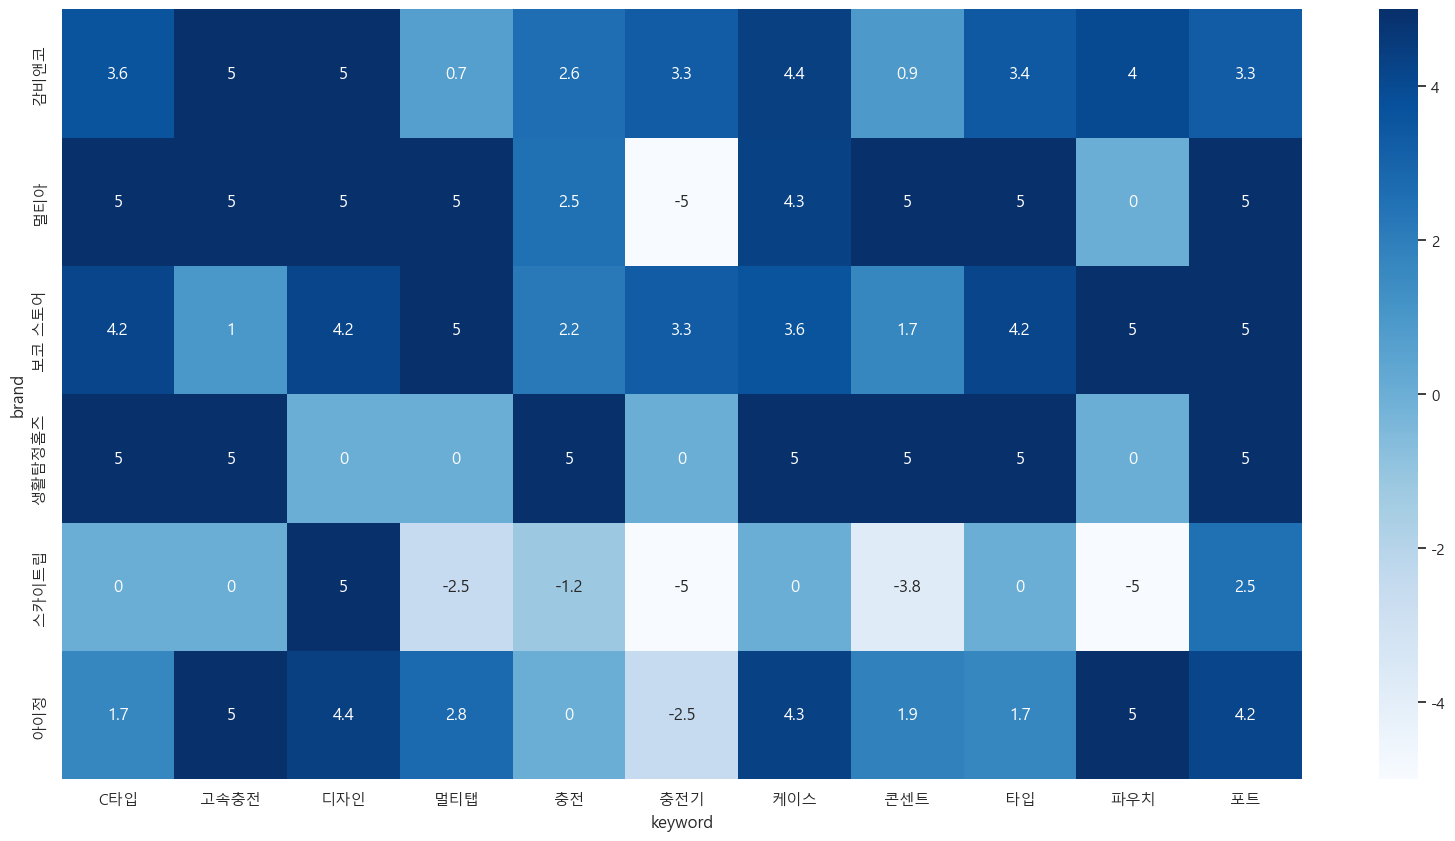

In [49]:
"""
# 전체 대상 결과 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       brands=brands_unique,
                       k=1
                       )[1],
                       is_annot=True
                       )
"""
# 부분 결과 예시 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       brands=['감비앤코','멀티아','보코 스토어','생활탐정홈즈','스카이트립','아이정'],
                       k=1
                       )[1],
                       is_annot=True,
                       fig_size_input = (20,10)
                       )

In [50]:
print(f'''
    어댑터의 sentiment 결과값은 아래와 같습니다.
    
    1. 브랜드들 통합 결과
    {list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       k=1
                       )[0]}
    
    2. 브랜드 개별 결과
    {list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       k=1
                       )[1]}       
        ''')


    어댑터의 sentiment 결과값은 아래와 같습니다.
    
    1. 브랜드들 통합 결과
                                                   brands keyword  \
0   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...      충전   
1   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     케이스   
2   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     디자인   
3   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...      포트   
4   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     콘센트   
5   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     파우치   
6   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...      타입   
7   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...    고속충전   
8   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     멀티탭   
9   스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     충전기   
10  스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...     C타입   

    sentiment_norm_score  
0                    2.4  
1                    4.1  
2                    4.5  
3                    3.5  
4                    1

In [51]:
list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       k=1
                       )[0]

,brands,keyword,sentiment_norm_score
0,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",충전,2.4
1,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",케이스,4.1
2,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",디자인,4.5
3,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",포트,3.5
4,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",콘센트,1.1
5,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",파우치,4.1
6,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",타입,3.1
7,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",고속충전,2.4
8,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",멀티탭,2.1
9,"스카이트립, 감비앤코, 지티스몰, 파워존 스토어, UM2 COBY, 주식회사 지토스...",충전기,1.2


In [52]:
list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       k=1
                       )[1]

,brand,keyword,sentiment_norm_score
0,스카이트립,충전,-1.2
1,감비앤코,충전,2.6
2,지티스몰,충전,1.4
3,파워존 스토어,충전,1.7
4,UM2 COBY,충전,5.0
...,...,...,...
732,열몽,C타입,0.0
733,morac,C타입,0.0
734,가우넷,C타입,0.0
735,주파집,C타입,-0.7


### Test 과정 

In [ ]:
# topic에 대한 sentiment score 결과값 받는 함수 작성
def topic_sentiment_score(df, topic, k=1):
    ''' 
    # parameters
        df : dataframe contains sentiment score
        topic : topic keyword (단일 키워드, str)
        k : score 표시 소수점 자리 (default=1)
    '''
    topic_sent_df = df[df.tokenized_sentence.notna() & df.tokenized_sentence.str.contains(topic)]   # NA 있지 않고 topic에 대한 행 추출해 결과 처리 진행 
    sent_score = topic_sent_df['sentiment'].sum() / len(topic_sent_df)                              # 전체 대비 sentiment 평점
    sent_normalize = round(sent_score*5,k)                                                          # 5까지로 정규화 
    return sent_normalize    

In [ ]:
topic_sentiment_score(general, topic='충전')

2.4

In [ ]:
# topic에 대한 sentiment score 결과값 받는 함수 작성
def topic_polarity_norm_score(df, topic):
    ''' 
    # parameters
        df : dataframe contains sentiment score
        topic : topic keyword (단일 키워드, str)
        k : score 표시 소수점 자리 (default=1)
    '''
    topic_sent_df = df[df.tokenized_sentence.notna() & df.tokenized_sentence.str.contains(topic)]   # NA 있지 않고 topic에 대한 행 추출해 결과 처리 진행 
    topic_review_cnt = len(topic_sent_df)
    topic_olarity_minmax_norm = round(((topic_sent_df['polarity'] - min(topic_sent_df['polarity'])) / (max(topic_sent_df['polarity']) - min(topic_sent_df['polarity'])))*4+1, 1)
    mean_topic_olarity_minmax_norm = round((sum(topic_olarity_minmax_norm) / topic_review_cnt), 1)
    return mean_topic_olarity_minmax_norm

In [ ]:
topic_polarity_norm_score(general, topic='파우치')

2.8

In [53]:
#### 아래는 Test 내용 

test_list = ['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입']

keyword_sent_result = []

for i in test_list:
    var_name5 = f'{i}_sent'
    var_name6 = f'{i}_score'
    var_name7 = f'{i}_norm_score'

    #brand_filtered = general[general['brand_name'].contains('스카이트립')]

    globals()[var_name5] = general[general.tokenized_sentence.notna() & general.tokenized_sentence.str.contains(i)]

    if len(globals()[var_name5]) > 0:
        globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
    else:
        globals()[var_name6] = 0
    
    # 5까지로 정규화
    globals()[var_name7] = round(globals()[var_name6]*5,1)
    
    # 결과 리스트에 append
    keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

print(keyword_sent_result)

[{'keyword': '충전', 'sentiment_norm_score': 2.4}, {'keyword': '케이스', 'sentiment_norm_score': 4.1}, {'keyword': '디자인', 'sentiment_norm_score': 4.5}, {'keyword': '포트', 'sentiment_norm_score': 3.5}, {'keyword': '콘센트', 'sentiment_norm_score': 1.1}, {'keyword': '파우치', 'sentiment_norm_score': 4.1}, {'keyword': '타입', 'sentiment_norm_score': 3.1}, {'keyword': '고속충전', 'sentiment_norm_score': 2.4}, {'keyword': '멀티탭', 'sentiment_norm_score': 2.1}, {'keyword': '충전기', 'sentiment_norm_score': 1.2}, {'keyword': 'C타입', 'sentiment_norm_score': 3.0}]


In [54]:
#### 아래는 Test 내용 (Brand 추가)

test_list = ['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입']
brand_filter_list = ['스카이트립','감비앤코']

keyword_sent_result = []
brands_sent_result = []
brand_result = []

for i in test_list:
    var_name5 = f'{i}_sent'
    var_name6 = f'{i}_score'
    var_name7 = f'{i}_norm_score'

    # brand로 필터링
    brand_filtered = general[general['brand_name'].str.contains('|'.join(brand_filter_list))]

    globals()[var_name5] = brand_filtered[brand_filtered.tokenized_sentence.notna() & brand_filtered.tokenized_sentence.str.contains(i)]

    if len(globals()[var_name5]) > 0:
        globals()[var_name6] = globals()[var_name5]['sentiment'].sum() / len(globals()[var_name5])
    else:
        globals()[var_name6] = 0
    
    # 5까지로 정규화
    globals()[var_name7] = round(globals()[var_name6]*5,1)
    
    # 결과 리스트에 append
    keyword_sent_result.append({"keyword": i, "sentiment_norm_score": globals()[var_name7]})

    # 브랜드 결과 리스트에 append
    brands_sent_result.append({"brands": ', '.join(brand_filter_list), "keyword":i, "sentiment_norm_score": globals()[var_name7]})

    
    #### 브랜드 개별 값도 추가
    for j in brand_filter_list:
        var_name8 = f'{i}_{j}_brand_sent'
        var_name9 = f'{i}_{j}_brand_score'
        var_name10 = f'{i}_{j}_brand_norm_score'
        var_name11 = f'{j}_brand_df'

        globals()[var_name11] = general[general['brand_name'].str.contains(j)]
        globals()[var_name8] = globals()[var_name11][globals()[var_name11].tokenized_sentence.str.contains(i)]

        if len(globals()[var_name8]) > 0:
            globals()[var_name9] = globals()[var_name8]['sentiment'].sum() / len(globals()[var_name8])
        else:
            globals()[var_name9] = 0
        
        # 5까지로 정규화
        globals()[var_name10] = round(globals()[var_name9]*5,1)

        # 브랜드 결과 리스트에 append
        brand_result.append({"brand": j, "keyword": i, "sentiment_norm_score": globals()[var_name10]})

total_brands_result_df = pd.DataFrame(brands_sent_result)
diff_brands_result_df = pd.DataFrame(brand_result) 

In [55]:
# 전체 입력 브랜드 결과
total_brands_result_df

,brands,keyword,sentiment_norm_score
0,"스카이트립, 감비앤코",충전,1.9
1,"스카이트립, 감비앤코",케이스,4.4
2,"스카이트립, 감비앤코",디자인,5.0
3,"스카이트립, 감비앤코",포트,3.1
4,"스카이트립, 감비앤코",콘센트,-0.3
5,"스카이트립, 감비앤코",파우치,3.6
6,"스카이트립, 감비앤코",타입,3.4
7,"스카이트립, 감비앤코",고속충전,5.0
8,"스카이트립, 감비앤코",멀티탭,0.0
9,"스카이트립, 감비앤코",충전기,0.0


In [56]:
# 입력 개별 브랜드 결과
diff_brands_result_df

,brand,keyword,sentiment_norm_score
0,스카이트립,충전,-1.2
1,감비앤코,충전,2.6
2,스카이트립,케이스,0.0
3,감비앤코,케이스,4.4
4,스카이트립,디자인,5.0
5,감비앤코,디자인,5.0
6,스카이트립,포트,2.5
7,감비앤코,포트,3.3
8,스카이트립,콘센트,-3.8
9,감비앤코,콘센트,0.9


In [57]:
diff_brands_result_df.pivot(index='brand',columns='keyword', values='sentiment_norm_score')

keyword,C타입,고속충전,디자인,멀티탭,충전,충전기,케이스,콘센트,타입,파우치,포트
brand,,,,,,,,,,,
감비앤코,3.6,5.0,5.0,0.7,2.6,3.3,4.4,0.9,3.4,4.0,3.3
스카이트립,0.0,0.0,5.0,-2.5,-1.2,-5.0,0.0,-3.8,0.0,-5.0,2.5


- 색상 변경시 해당 블로그 참조 : (https://wewegh.tistory.com/44)

<Axes: xlabel='keyword', ylabel='brand'>

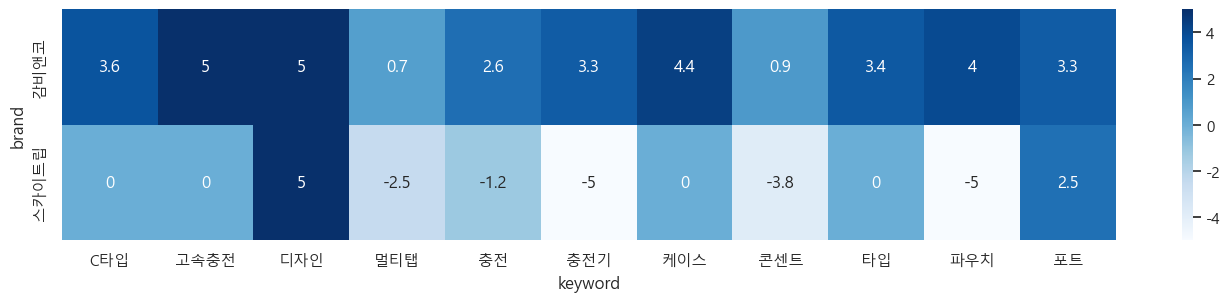

In [58]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')
ax = plt.subplots(figsize=(17,3))   # 입력 많이 받았을 땐 해당란 제외하는 것이 좋을 듯 
sns.heatmap(diff_brands_result_df.pivot(index='brand',columns='keyword', values='sentiment_norm_score'), 
            center=0, cmap='Blues', annot=True, fmt='.3g')

In [59]:
#충전_스카이트립_brand_sent

In [60]:
total_topic_sent_df = pd.DataFrame(keyword_sent_result)
total_topic_sent_df

,keyword,sentiment_norm_score
0,충전,1.9
1,케이스,4.4
2,디자인,5.0
3,포트,3.1
4,콘센트,-0.3
5,파우치,3.6
6,타입,3.4
7,고속충전,5.0
8,멀티탭,0.0
9,충전기,0.0


<Axes: xlabel='keyword', ylabel='brand'>

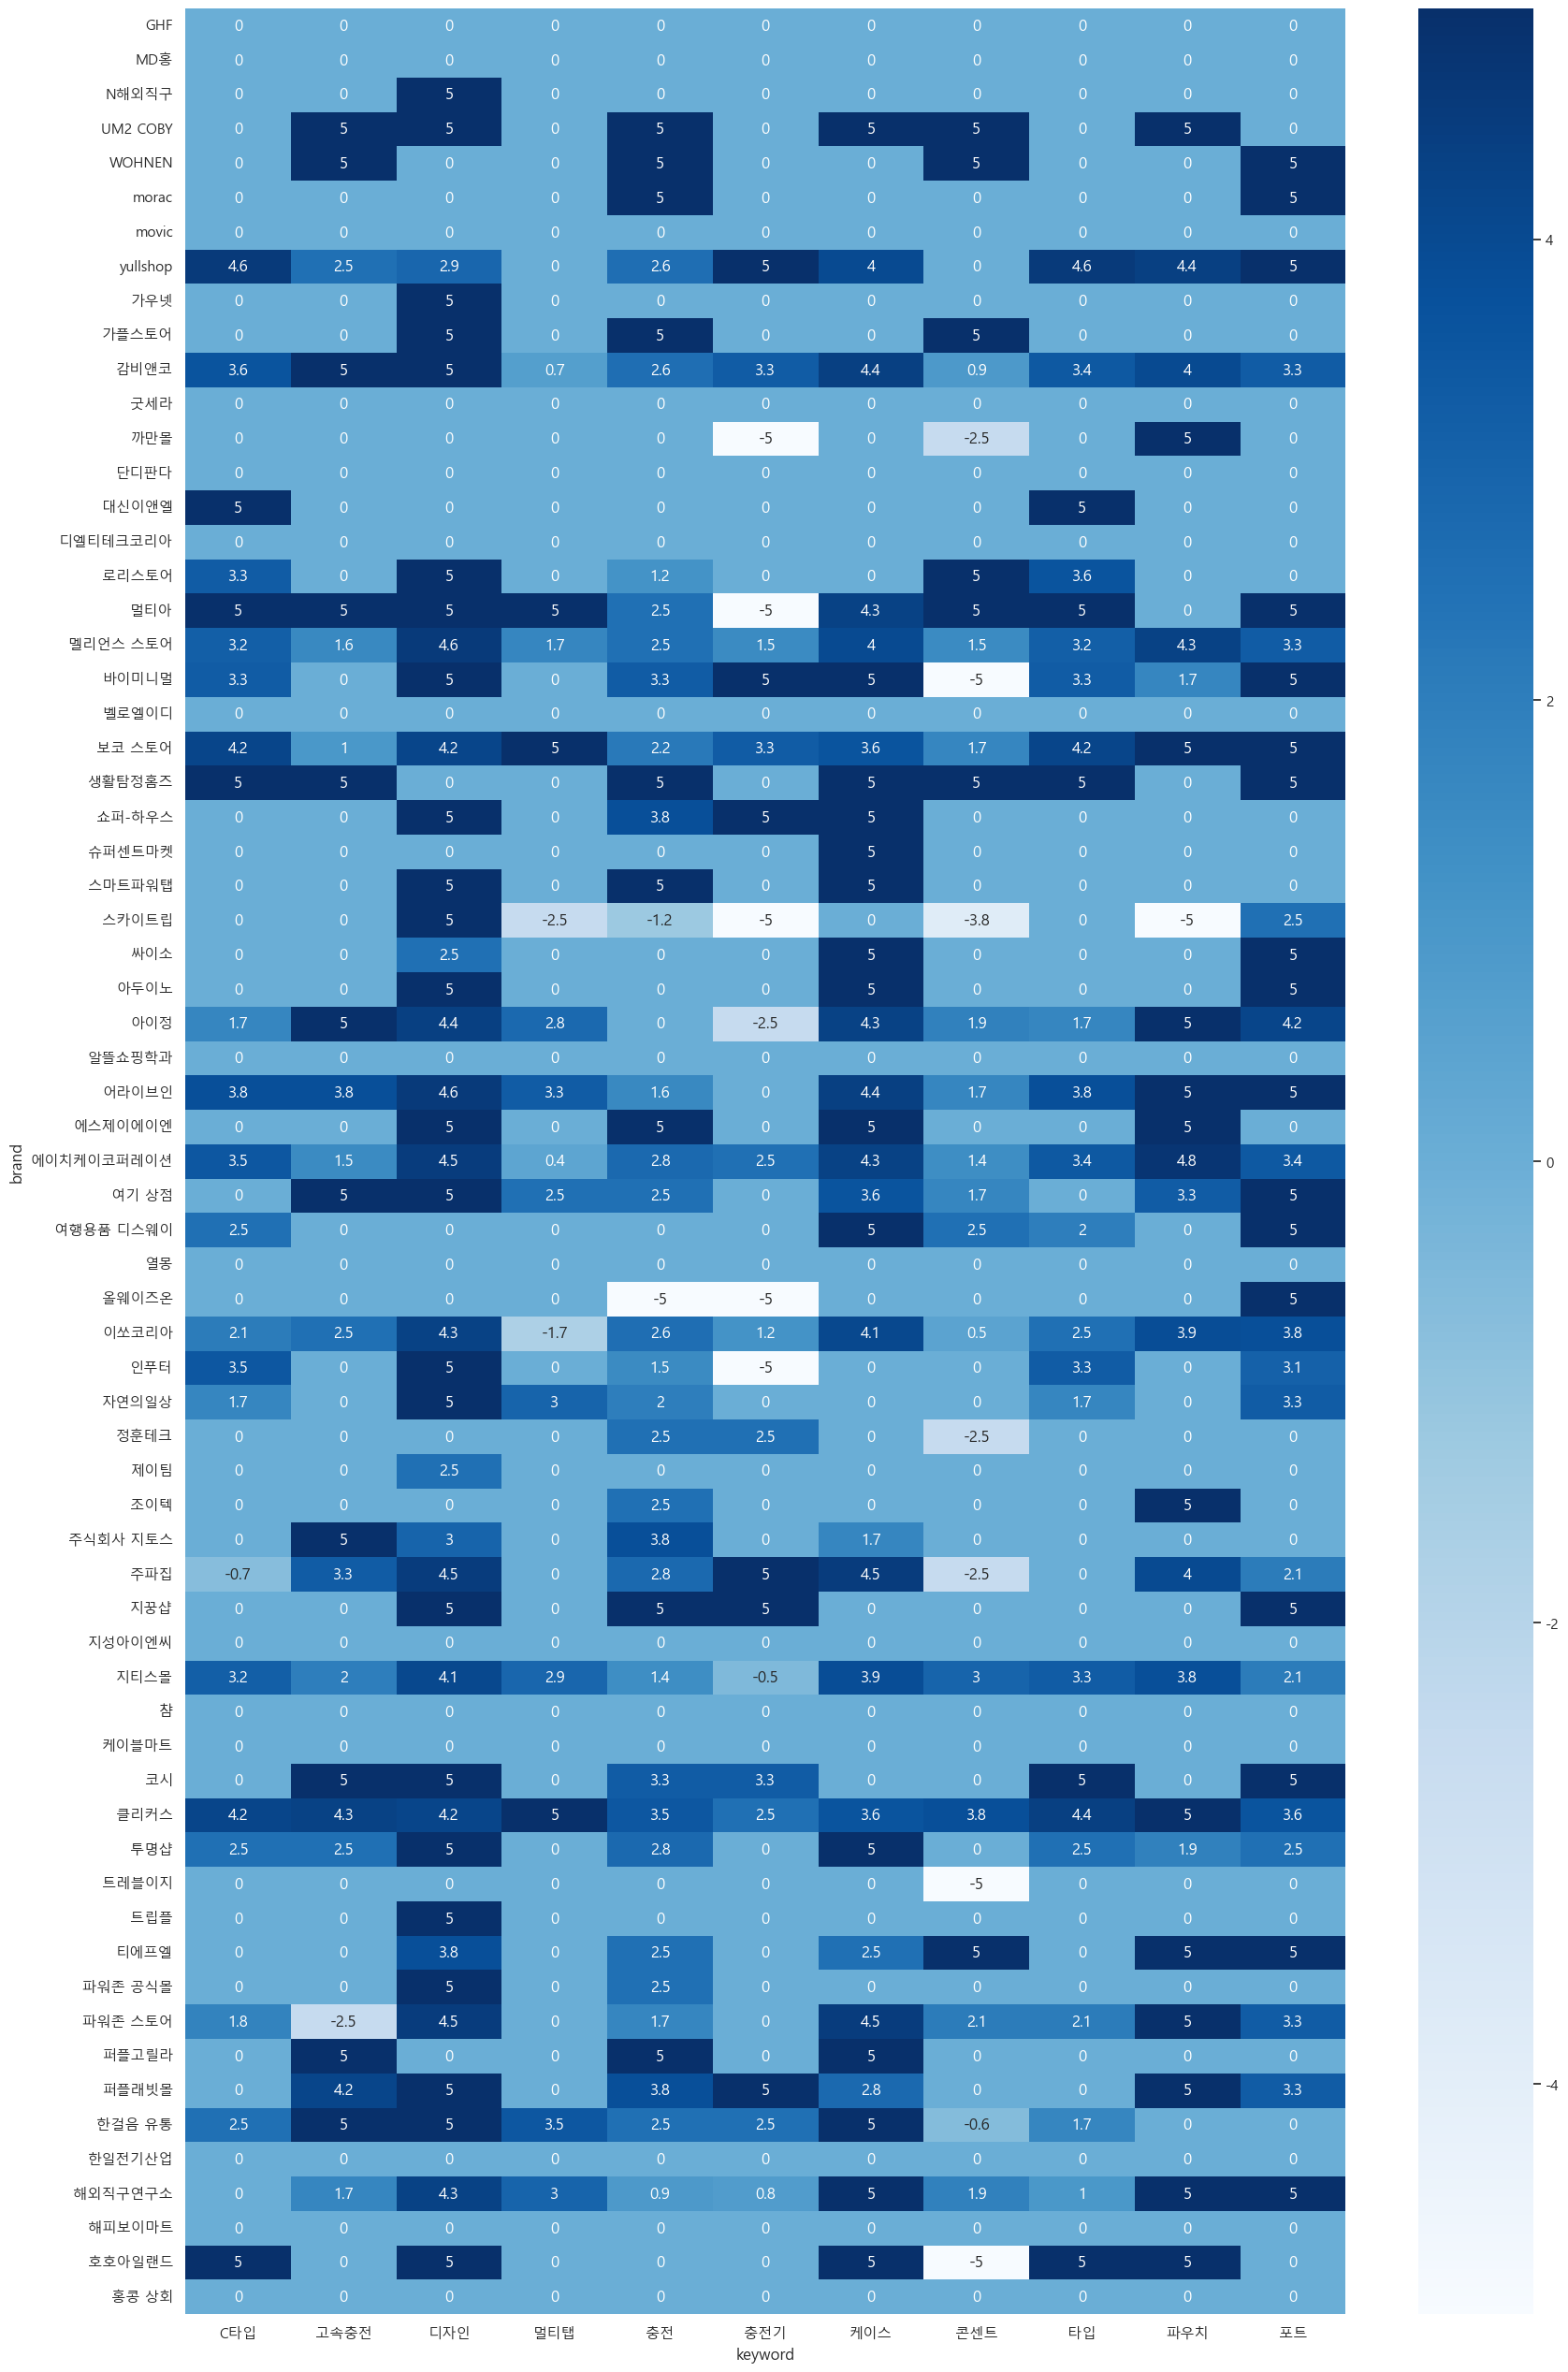

In [61]:
# 전체 대상 결과 
brand_impact_topic(list_brand_topic_score(filtered_df, 
                       topic_lst=['충전','케이스','디자인','포트','콘센트','파우치','타입','고속충전','멀티탭','충전기','C타입'],
                       brands=brands_unique,
                       k=1
                       )[1],
                       is_annot=True
                       )

### 부가 확인

In [62]:
# NaN 여부 확인
general[general['tokenized_sentence'].isna()]

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment


In [63]:
general_2 = general.copy()

general_2['tokenized_sentence_len'] = general_2['tokenized_sentence'].apply(lambda x : len(x))
general_2[general_2['tokenized_sentence_len']==0]

,brand_name,product_name,write_dt_lst,rating_lst,content_lst,len,repeated_final,review_type,tokenized_sentence,detail_review_type,morphs,Tokenized_morphs_list,match_dic,polarity,sentiment,tokenized_sentence_len
